In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
import pandas as pd

# Metrics Analysis

## Functions

In [1]:
cidades = ["aracaju", "joaopessoa", "maceio", "natal", "recife", "salvador", "saoluis", "teresina", "fortaleza"]

def create_Metrics_dataframe(cidades):

    dict_metrics_list = []

    for cidade in cidades:
        # Using readlines()
        #print(cidade)
        list_of_files = glob.glob("./cidades/{0}/AutoMLResults/results_*.txt".format(cidade)) # * means all if need specific format then *.csv
        last_result_file = os.path.basename(max(list_of_files, key=os.path.getctime))
        #print(last_result_file)
        results_file = open("./cidades/{0}/AutoMLResults/{1}".format(cidade, last_result_file), 'r')
        result_Lines = results_file.readlines()
        
        count = 0
        # Strips the newline character
        for line in result_Lines:
            count += 1
            lineContent = line.strip()
            #print("Line{}: {}".format(count, lineContent))
            if "Scores" not in lineContent:
                dict_metrics = {"city":"", "metric":"", "value":"", "automl":""}
                metric=lineContent[lineContent.find("-")+1:lineContent.find(":")].strip()
                value=float(lineContent[lineContent.find(":")+1:].strip())
                automl=lineContent[:lineContent.find("-")-1].strip()
                if metric != "MAPE":
                    dict_metrics["city"]=cidade
                    dict_metrics["metric"]=metric
                    dict_metrics["value"]=value
                    dict_metrics["automl"]=automl
                    dict_metrics_list.append(dict_metrics)

    df = pd.DataFrame(dict_metrics_list)
    df.replace("joaopessoa", "João Pessoa", inplace=True)
    df.replace("saoluis", "São Luis", inplace=True)
    df.replace("maceio", "Maceió", inplace=True)
    df.city = df.city.apply(lambda x: x.capitalize())

    return df

def countWinners(dataFrame):
    ACOCLSTM_wins = []
    ACOLSTM_wins = []
    AUTOKERAS_wins = []
    AGMMFF_wins = []
    TPOT_wins = []
    HPSKLEARN_wins = []
    for metric in dataFrame.metric.unique():
        for city in dataFrame.city.unique():
            #print(df_metrics[(df_metrics["metric"]==metric) & (df_metrics["city"]==city)].sort_values(by="value", ascending=True))
            winner = df_metrics[(df_metrics["metric"]==metric) & (df_metrics["city"]==city)].sort_values(by="value", ascending=True).automl.values[0]
            if winner == "ACOLSTM":
                ACOLSTM_wins.append(city+" - "+metric)
            elif winner == "ACOCLSTM":
                ACOLSTM_wins.append(city+" - "+metric)
            elif winner == "AGMMFF":
                AGMMFF_wins.append(city+" - "+metric)
            elif winner == "TPOT":
                TPOT_wins.append(city+" - "+metric)
            elif winner == "HPSKLEARN":
                HPSKLEARN_wins.append(city+" - "+metric)
            elif winner == "AUTOKERAS":
                AUTOKERAS_wins.append(city+" - "+metric)
        
    return {"ACOLSTM":ACOLSTM_wins, "ACOCLSTM":ACOCLSTM_wins, "AUTOKERAS":AUTOKERAS_wins,
     "AGMMFF":AGMMFF_wins, "TPOT":TPOT_wins, "HPSKLEARN":HPSKLEARN_wins}

## Winners

In [7]:
df_metrics = create_Metrics_dataframe(cidades)
automl_wins = countWinners(df_metrics)
print(automl_wins)

{'ACOLSTM': ['Aracaju - MAE', 'Natal - MAE', 'Recife - MAE', 'Salvador - MAE', 'São luis - MAE', 'Teresina - MAE', 'João pessoa - SMAPE', 'São luis - SMAPE', 'Natal - MSE', 'Recife - MSE', 'Salvador - MSE', 'Teresina - MSE'], 'ACOCLSTM': [], 'AUTOKERAS': ['Natal - SMAPE'], 'AGMMFF': ['Aracaju - SMAPE', 'Recife - SMAPE', 'Salvador - SMAPE', 'Teresina - SMAPE', 'Fortaleza - SMAPE'], 'TPOT': ['João pessoa - MAE', 'Maceió - MAE', 'Maceió - SMAPE', 'Aracaju - MSE', 'João pessoa - MSE', 'São luis - MSE'], 'HPSKLEARN': ['Fortaleza - MAE', 'Maceió - MSE', 'Fortaleza - MSE']}


## SMAPE Bar Plot

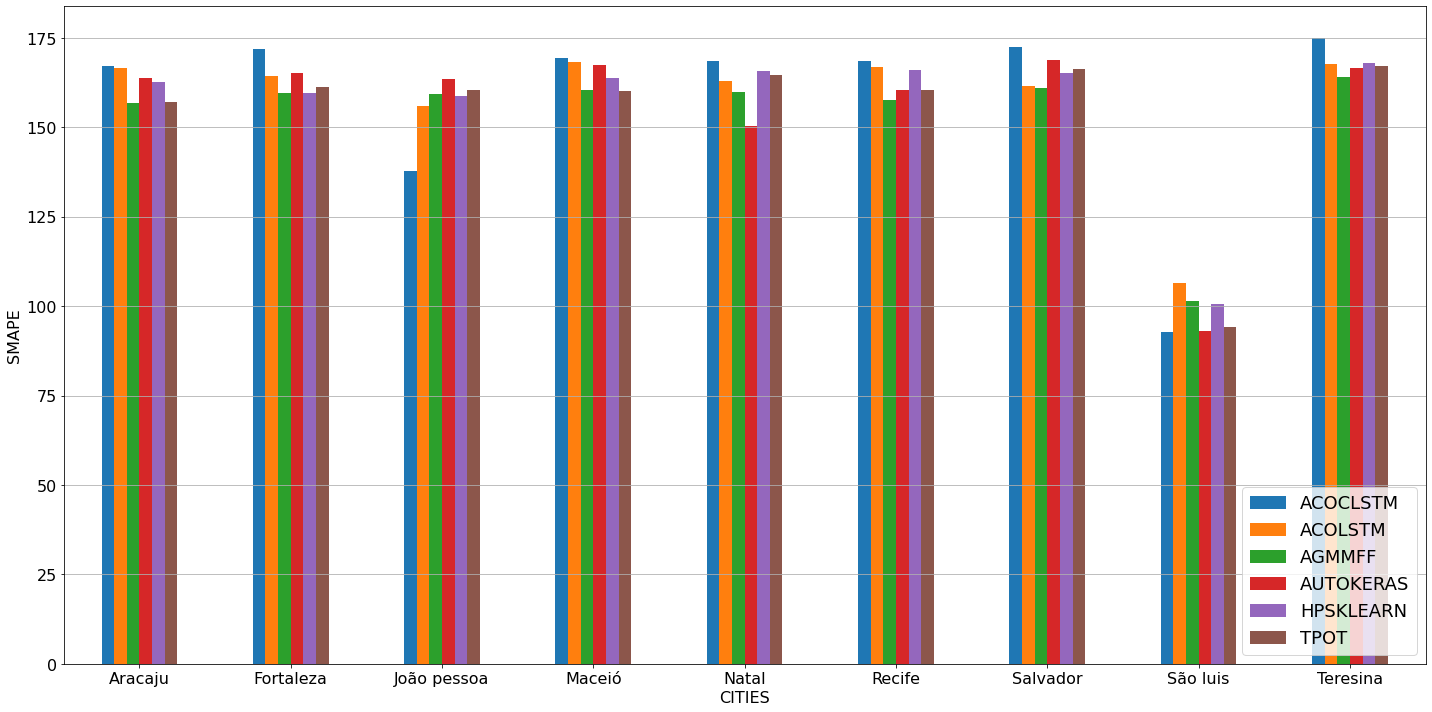

In [8]:
df_pivot = df_metrics[df_metrics["metric"]=="SMAPE"].pivot(index="city", columns="automl", values="value")
ax1 = df_pivot.sort_values(by=("city")).plot(fontsize=16,figsize=(20,10), kind="bar", rot=0)
ax1.set_xlabel('CITIES',fontdict={'fontsize':16})
ax1.set_ylabel('SMAPE',fontdict={'fontsize':16})
#ax1.set_yticks(list(range(0,10,200)))
ax1.grid(axis='y')
ax1.legend(loc=4,prop=dict(size=18))
plt.tight_layout()
plt.savefig('autoMLExperiencResults/barplot_smape.png', dpi=300)

## MAE Bar Plot

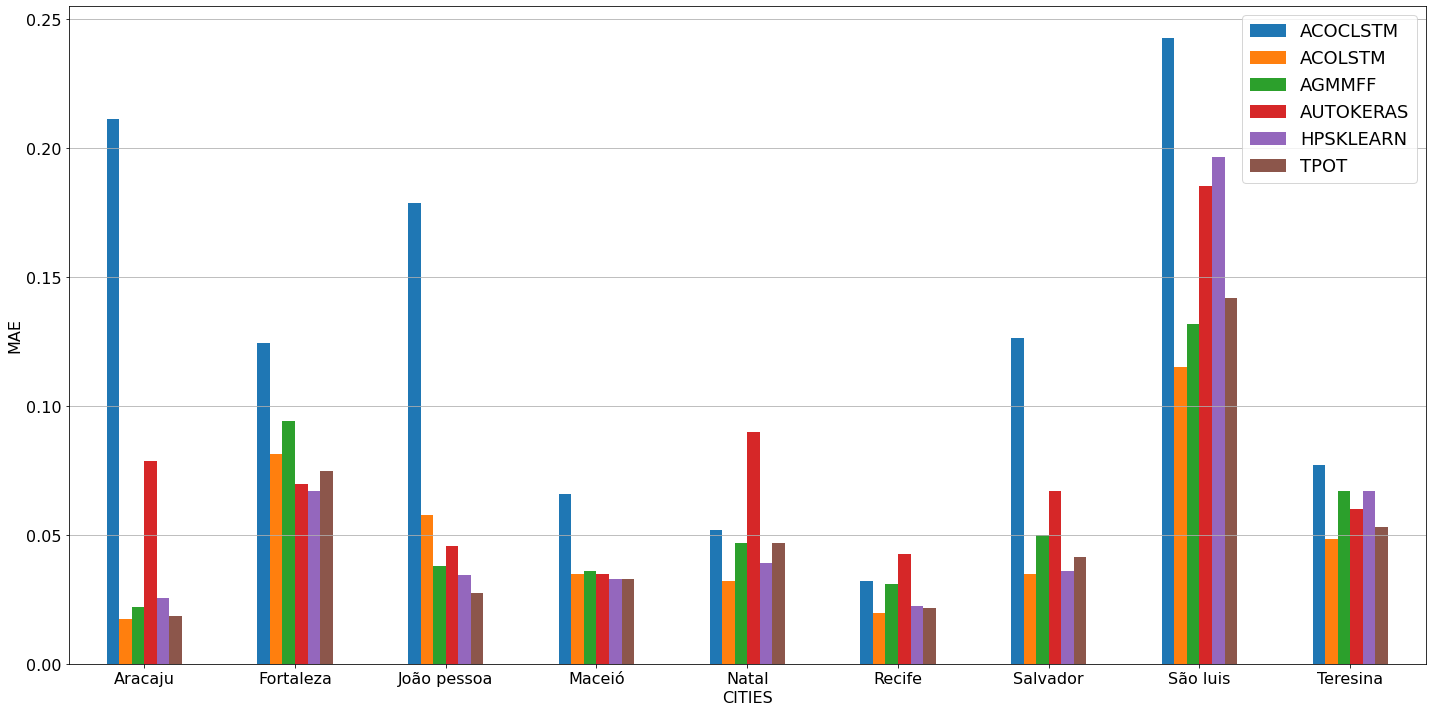

In [9]:
df_pivot = df_metrics[df_metrics["metric"]=="MAE"].pivot(index="city", columns="automl", values="value")
ax1 = df_pivot.sort_values(by=("city")).plot(fontsize=16,figsize=(20,10), kind="bar", rot=0)
ax1.set_xlabel('CITIES',fontdict={'fontsize':16})
ax1.set_ylabel('MAE',fontdict={'fontsize':16})
#ax1.set_yticks(list(range(0,10,200)))
ax1.grid(axis='y')
ax1.legend(loc=0,prop=dict(size=18))
plt.tight_layout()
plt.savefig('autoMLExperiencResults/barplot_mae.png', dpi=300)

## MSE Bar Plot

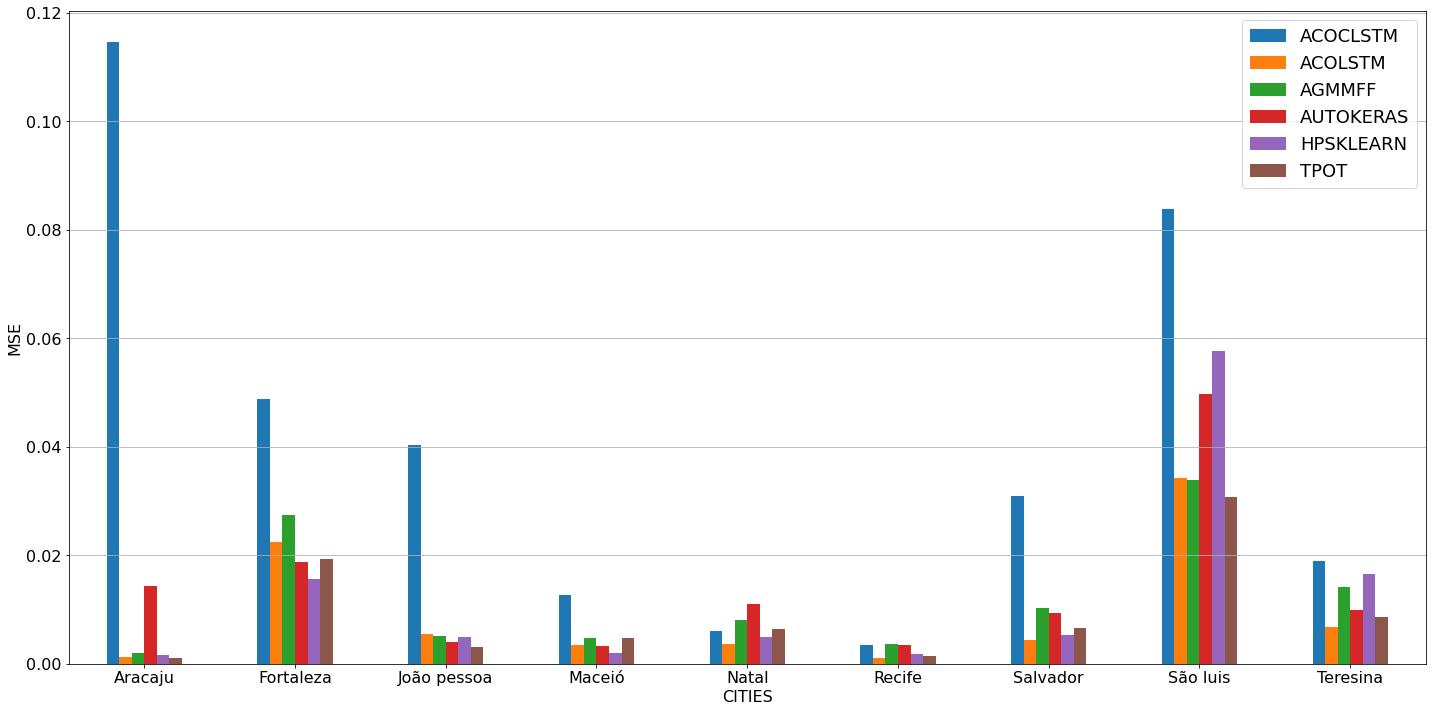

In [10]:
df_pivot = df_metrics[df_metrics["metric"]=="MSE"].pivot(index="city", columns="automl", values="value")
ax1 = df_pivot.sort_values(by=("city")).plot(fontsize=16,figsize=(20,10), kind="bar", rot=0)
ax1.set_xlabel('CITIES',fontdict={'fontsize':16})
ax1.set_ylabel('MSE',fontdict={'fontsize':16})
#ax1.set_yticks(list(range(0,10,200)))
ax1.grid(axis='y')
ax1.legend(loc=0,prop=dict(size=18))
plt.tight_layout()
plt.savefig('autoMLExperiencResults/barplot_mse.png', dpi=300)

# Simplifid Power Flux 

In [2]:
cidades = ["aracaju", "joaopessoa", "maceio", "natal", "recife", "salvador", "saoluis", "teresina", "fortaleza"]

def getArraysDict(cidades):

    cities_arrays = {}

    for cidade in cidades:
        list_of_arrays_paths = glob.glob("./cidades/{0}/AutoMLResults/y_*".format(cidade))
        city_dict = {}
        for array_path in list_of_arrays_paths:
            print(array_path)
            city_dict[os.path.basename(array_path)] = np.loadtxt(array_path, delimiter=';')
        cities_arrays[cidade] = city_dict
    
    return cities_arrays

Dict_Arrays = getArraysDict(cidades)

./cidades/aracaju/AutoMLResults\y_hat_ACOCLSTM
./cidades/aracaju/AutoMLResults\y_hat_ACOLSTM
./cidades/aracaju/AutoMLResults\y_hat_AGMMFF
./cidades/aracaju/AutoMLResults\y_hat_AUTOKERAS
./cidades/aracaju/AutoMLResults\y_hat_HPSKLEARN
./cidades/aracaju/AutoMLResults\y_hat_HYPEROPT
./cidades/aracaju/AutoMLResults\y_hat_TPOT
./cidades/aracaju/AutoMLResults\y_test
./cidades/joaopessoa/AutoMLResults\y_hat_ACOCLSTM
./cidades/joaopessoa/AutoMLResults\y_hat_ACOLSTM
./cidades/joaopessoa/AutoMLResults\y_hat_AGMMFF
./cidades/joaopessoa/AutoMLResults\y_hat_AUTOKERAS
./cidades/joaopessoa/AutoMLResults\y_hat_HPSKLEARN
./cidades/joaopessoa/AutoMLResults\y_hat_TPOT
./cidades/joaopessoa/AutoMLResults\y_test
./cidades/maceio/AutoMLResults\y_hat_ACOCLSTM
./cidades/maceio/AutoMLResults\y_hat_ACOLSTM
./cidades/maceio/AutoMLResults\y_hat_AGMMFF
./cidades/maceio/AutoMLResults\y_hat_AUTOKERAS
./cidades/maceio/AutoMLResults\y_hat_HPSKLEARN
./cidades/maceio/AutoMLResults\y_hat_TPOT
./cidades/maceio/AutoMLResult

In [3]:
Dict_Arrays

{'aracaju': {'y_hat_ACOCLSTM': array([ 0.02153618,  0.03985884,  0.01516328,  0.0075088 ,  0.00813966,
          0.00690951, -0.00553368, -0.01177392,  0.01035305,  0.06576686,
          0.14628403,  0.2334972 ,  0.30624256,  0.3583363 ,  0.3261452 ,
          0.22225042,  0.20159739,  0.25122842,  0.25221926,  0.20345917,
          0.15022527,  0.09727512,  0.00492899, -0.02301151,  0.02572597,
          0.03072168,  0.00881233,  0.00976841,  0.01173816,  0.00491082,
         -0.00418639, -0.00718403,  0.02764736,  0.09123535,  0.16362649,
          0.24881954,  0.31908369,  0.36037207,  0.31673664,  0.19626489,
          0.18861394,  0.24651057,  0.24941383,  0.20698766,  0.15990412,
          0.11301647,  0.01836314, -0.02515702,  0.01814551,  0.02587511,
          0.01106185,  0.01129867,  0.00914007,  0.00665313,  0.00115234,
         -0.00466266,  0.02834581,  0.08747197,  0.15347357,  0.23534873,
          0.30467236,  0.36137787,  0.34111065,  0.2370984 ,  0.20476712,
         